In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv("HousingData.csv")

Preparing Dataset

In [3]:
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [5]:
data["RAD"] = data["RAD"].astype("float64")

In [6]:
data["TAX"] = data["TAX"].astype("float64")

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [8]:
data.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [9]:
def mean_imputation(column):
    mean_value = column.mean()
    return column.fillna(mean_value)

In [10]:
df_imputed = data.apply(mean_imputation)

In [11]:
df_imputed

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.200000,4.0900,1.0,296.0,15.3,396.90,4.980000,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.900000,4.9671,2.0,242.0,17.8,396.90,9.140000,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.100000,4.9671,2.0,242.0,17.8,392.83,4.030000,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.800000,6.0622,3.0,222.0,18.7,394.63,2.940000,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.200000,6.0622,3.0,222.0,18.7,396.90,12.715432,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.100000,2.4786,1.0,273.0,21.0,391.99,12.715432,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.700000,2.2875,1.0,273.0,21.0,396.90,9.080000,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.000000,2.1675,1.0,273.0,21.0,396.90,5.640000,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.300000,2.3889,1.0,273.0,21.0,393.45,6.480000,22.0


In [12]:
df_imputed.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [13]:
df_imputed.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.182930,0.391161,-0.052223,0.410377,-0.215434,0.344934,-0.366523,0.608886,0.566528,0.273384,-0.370163,0.434044,-0.379695
ZN,-0.182930,1.000000,-0.513336,-0.036147,-0.502287,0.316550,-0.541274,0.638388,-0.306316,-0.308334,-0.403085,0.167431,-0.407549,0.365943
INDUS,0.391161,-0.513336,1.000000,0.058035,0.740965,-0.381457,0.614592,-0.699639,0.593176,0.716062,0.384806,-0.354597,0.567354,-0.478657
CHAS,-0.052223,-0.036147,0.058035,1.000000,0.073286,0.102284,0.075206,-0.091680,0.001425,-0.031483,-0.109310,0.050055,-0.046166,0.179882
NOX,0.410377,-0.502287,0.740965,0.073286,1.000000,-0.302188,0.711461,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.572379,-0.427321
RM,-0.215434,0.316550,-0.381457,0.102284,-0.302188,1.000000,-0.241351,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.602962,0.695360
AGE,0.344934,-0.541274,0.614592,0.075206,0.711461,-0.241351,1.000000,-0.724353,0.449989,0.500589,0.262723,-0.265282,0.574893,-0.380223
DIS,-0.366523,0.638388,-0.699639,-0.091680,-0.769230,0.205246,-0.724353,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.483429,0.249929
RAD,0.608886,-0.306316,0.593176,0.001425,0.611441,-0.209847,0.449989,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.468440,-0.381626
TAX,0.566528,-0.308334,0.716062,-0.031483,0.668023,-0.292048,0.500589,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.524545,-0.468536


Text(0, 0.5, 'Price')

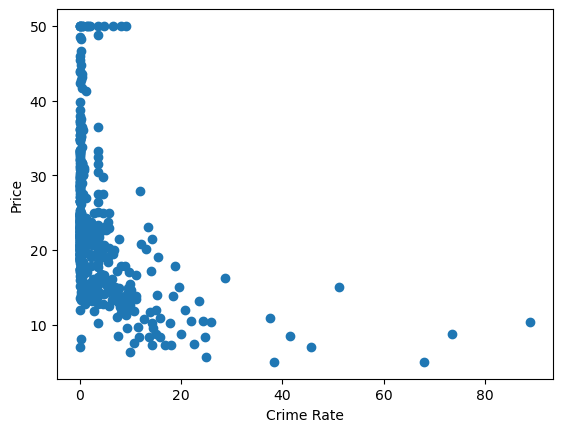

In [14]:
plt.scatter(df_imputed["CRIM"], df_imputed["MEDV"])
plt.xlabel("Crime Rate")
plt.ylabel("Price")

Text(0, 0.5, 'Price')

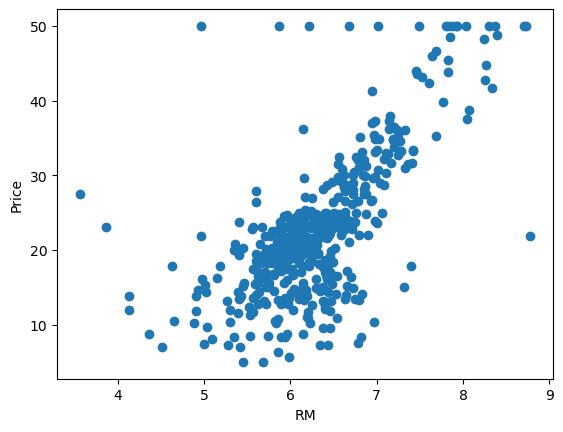

In [15]:
plt.scatter(df_imputed["RM"], df_imputed["MEDV"])
plt.xlabel("RM")
plt.ylabel("Price")

<Axes: xlabel='RM', ylabel='MEDV'>

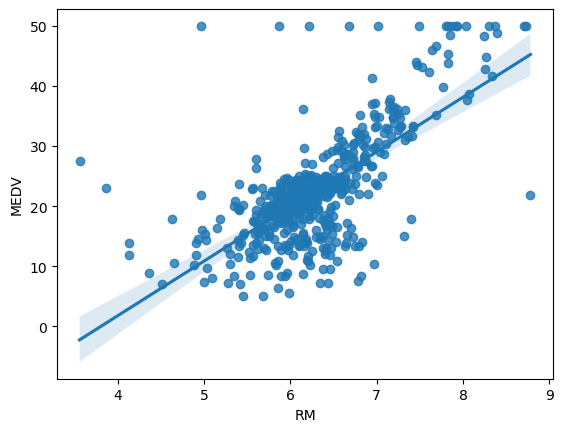

In [16]:
import seaborn as sns
sns.regplot(x="RM", y="MEDV", data = df_imputed)

<Axes: xlabel='LSTAT', ylabel='MEDV'>

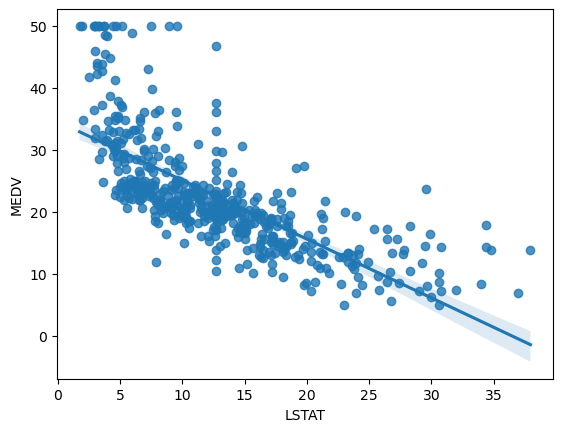

In [17]:
sns.regplot(x="LSTAT", y="MEDV", data = df_imputed)

<Axes: xlabel='CHAS', ylabel='MEDV'>

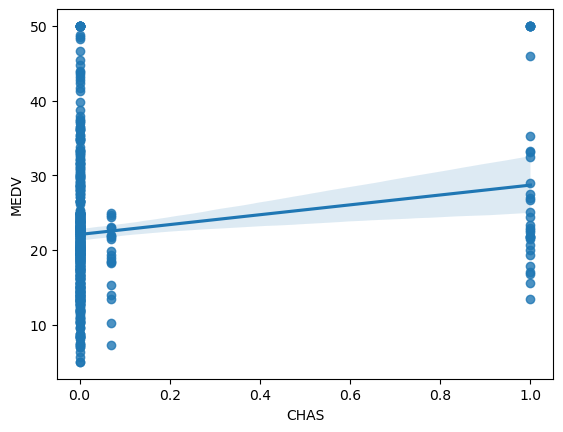

In [18]:
sns.regplot(x="CHAS", y="MEDV", data = df_imputed)

<Axes: xlabel='PTRATIO', ylabel='MEDV'>

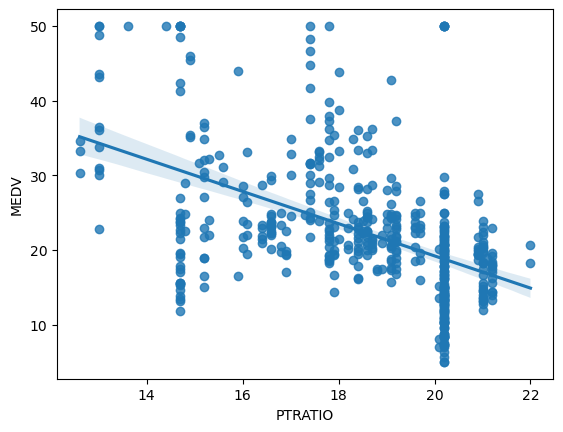

In [19]:
sns.regplot(x="PTRATIO", y="MEDV", data = df_imputed)

In [20]:
# Independent and dependent features

X = df_imputed.iloc[:, :-1]
y = df_imputed.iloc[:, -1]

In [21]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.980000
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.140000
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.030000
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.940000
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,12.715432


In [22]:
# train test split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)

In [23]:
X_train

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.210000
116,0.13158,0.0,10.01,0.0,0.547,6.176,72.5,2.7301,6.0,432.0,17.8,393.30,12.715432
45,0.17142,0.0,6.91,0.0,0.448,5.682,33.8,5.1004,3.0,233.0,17.9,396.90,10.210000
16,1.05393,0.0,8.14,0.0,0.538,5.935,29.3,4.4986,4.0,307.0,21.0,386.85,6.580000
468,15.57570,0.0,18.10,0.0,0.580,5.926,71.0,2.9084,24.0,666.0,20.2,368.74,18.130000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,0.17120,0.0,8.56,0.0,0.520,5.836,91.9,2.2110,5.0,384.0,20.9,395.67,18.660000
270,0.29916,20.0,6.96,0.0,0.464,5.856,42.1,4.4290,3.0,223.0,18.6,388.65,13.000000
348,0.01501,80.0,2.01,0.0,0.435,6.635,29.7,8.3440,4.0,280.0,17.0,390.94,5.990000
435,11.16040,0.0,18.10,0.0,0.740,6.629,94.6,2.1247,24.0,666.0,20.2,109.85,23.270000


In [24]:
X_test

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
173,0.09178,0.0,11.083992,0.0,0.510,6.416,68.518519,2.6463,5.0,296.0,16.6,395.50,9.040000
274,0.05644,40.0,6.410000,1.0,0.447,6.758,32.900000,4.0776,4.0,254.0,17.6,396.90,3.530000
491,0.10574,0.0,27.740000,0.0,0.609,5.983,98.800000,1.8681,4.0,711.0,20.1,390.11,18.070000
72,0.09164,0.0,10.810000,0.0,0.413,6.065,7.800000,5.2873,4.0,305.0,19.2,390.91,5.520000
452,5.09017,0.0,18.100000,0.0,0.713,6.297,91.800000,2.3682,24.0,666.0,20.2,385.09,17.270000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
441,9.72418,0.0,18.100000,0.0,0.740,6.406,97.200000,2.0651,24.0,666.0,20.2,385.96,12.715432
23,0.98843,0.0,8.140000,0.0,0.538,5.813,100.000000,4.0952,4.0,307.0,21.0,394.54,19.880000
225,0.52693,0.0,6.200000,0.0,0.504,8.725,83.000000,2.8944,8.0,307.0,17.4,382.00,4.630000
433,5.58107,0.0,18.100000,0.0,0.713,6.436,87.900000,2.3158,24.0,666.0,20.2,100.19,16.220000


In [25]:
## Standardising the dataset

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [26]:
X_train = scaler.fit_transform(X_train)

In [27]:
X_test = scaler.transform(X_test)

In [28]:
X_train

array([[-0.42002854, -0.51161896, -1.31729854, ...,  0.18727079,
         0.39651419, -1.04595325],
       [-0.4076886 , -0.51161896, -0.15405495, ..., -0.21208981,
         0.3870674 ,  0.03449941],
       [-0.40285597, -0.51161896, -0.61459839, ..., -0.16771641,
         0.42854113, -0.3261728 ],
       ...,
       [-0.42182865,  3.06664934, -1.34255415, ..., -0.56707702,
         0.35987906, -0.9336675 ],
       [ 0.93011786, -0.51161896,  1.04781486, ...,  0.8528718 ,
        -2.87841346,  1.55389374],
       [-0.39590057, -0.51161896, -0.36947043, ...,  1.16348561,
        -3.32828832, -0.26571124]])

In [29]:
X_test

array([[-0.41251638, -0.51161896,  0.00549984, ..., -0.74457062,
         0.41241246, -0.49460143],
       [-0.41680315,  1.27751519, -0.68887959, ..., -0.30083661,
         0.42854113, -1.28779948],
       [-0.41082301, -0.51161896,  2.47995639, ...,  0.8084984 ,
         0.35031705,  0.80532207],
       ...,
       [-0.35973226, -0.51161896, -0.7200777 , ..., -0.38958342,
         0.25688594, -1.12944778],
       [ 0.25333977, -0.51161896,  1.04781486, ...,  0.8528718 ,
        -2.98970133,  0.5390033 ],
       [ 0.78024446, -0.51161896,  1.04781486, ...,  0.8528718 ,
         0.33199949,  0.57067364]])

# Model Training

In [30]:
from sklearn.linear_model import LinearRegression

In [31]:
regression = LinearRegression()

In [32]:
regression.fit(X_train, y_train)

LinearRegression()

In [33]:
## print the coefficients and the intercept

print(regression.coef_)

[-1.06184703  0.71347682 -0.07272768  0.94344207 -1.62856223  3.17333232
 -0.70109167 -3.04177516  1.69879013 -1.20047368 -1.99733627  1.02127847
 -3.28653232]


In [34]:
print(regression.intercept_)

23.01581920903955


In [35]:
## On which parameters the model has been train
regression.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

In [36]:
### Prediction with test Data
reg_pred = regression.predict(X_test)

In [37]:
reg_pred

array([28.94684244, 37.080947  , 15.16334344, 25.59977001, 18.52050399,
       22.92953198, 17.99840423, 14.43800382, 22.06639946, 20.81944231,
       25.11881906, 18.72123522, -6.3071011 , 21.86734043, 19.02489041,
       25.40599155, 19.37239698,  5.95086419, 40.85794132, 17.18432226,
       24.93251127, 30.36869589, 11.39935905, 22.76748541, 17.50857422,
       15.11943012, 21.39728476, 14.47830797, 23.13536511, 19.56542429,
       22.18119889, 25.26140438, 25.38274556, 17.33845553, 16.24266113,
       17.25502918, 30.91188566, 20.39390975, 24.67921133, 22.85756708,
       14.52166278, 31.79401526, 42.81650058, 17.99338659, 27.3605525 ,
       16.56320925, 13.95314318, 26.53462251, 19.75194991, 30.2586963 ,
       21.02578   , 33.48015966, 15.97922002, 26.27389748, 39.58817583,
       22.50675409, 18.73574376, 33.02789505, 25.25340181, 13.16505164,
       22.85496664, 31.01835795, 31.53871931, 16.756762  , 21.22003054,
       17.10830699, 19.99132099, 26.38841982, 31.29685552, 11.72

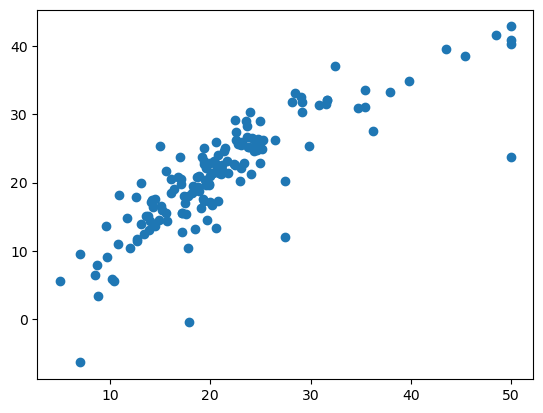

In [38]:
## plot a scatter plot for prediction

plt.scatter(y_test, reg_pred)

In [39]:
residuals = y_test-reg_pred 

In [40]:
residuals

173   -5.346842
274   -4.680947
491   -1.563343
72    -2.799770
452   -2.420504
         ...   
441   -3.386594
23     0.905782
225    9.774023
433   -2.093079
447   -5.269098
Name: MEDV, Length: 152, dtype: float64

C:\Users\RITHIK\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


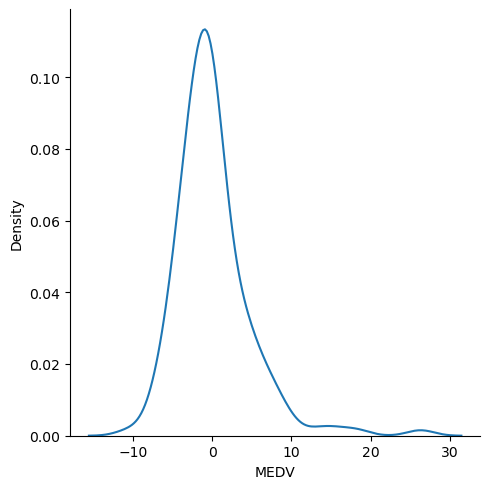

In [41]:
## Ploting this residuals

sns.displot(residuals, kind='kde')

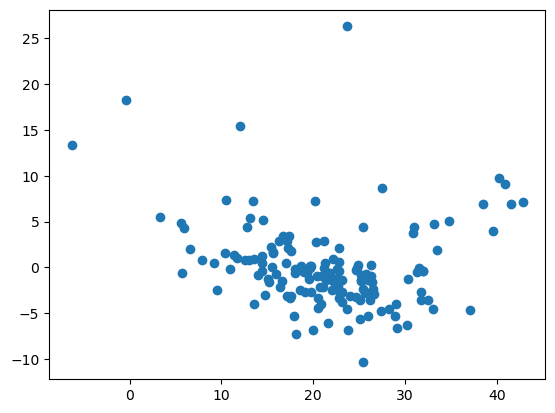

In [42]:
## Scatter Plot with respect to prediction and residuals
## uniform distribution
plt.scatter(reg_pred, residuals)

In [43]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

print(mean_absolute_error(y_test, reg_pred))
print(mean_squared_error(y_test, reg_pred))
print(np.sqrt(mean_squared_error(y_test, reg_pred)))

3.1410525671084684
21.818457953526046
4.6710232233982785


# R square and Adjusted R square

In [44]:
from sklearn.metrics import r2_score
score = r2_score(y_test, reg_pred)
print(score)

0.7071862632031756


In [45]:
# display adjusted R_squared
1-(1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.6796023604614457

# Pickling the model file for deployment

In [46]:
import pickle

In [47]:
pickle.dump(regression, open('regmodel.pkl', 'wb'))

In [48]:
pickled_model = pickle.load(open('regmodel.pkl', 'rb'))